In [1]:
#Allow output from every line and import necessary packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import PIL
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [32]:
#Read NCAA college basketball efficiency and tempo data from KenPom
KenPom = pd.read_csv("data/KenPomTournamentTeams_2024.csv")
KenPom = KenPom.rename(columns = {"Rk":"AdjEM Rank"})
KenPom = KenPom.iloc[:,[1,2,3,4,5,0,6,7,8,9,10,11,12,13]]
KenPom
#AdjEM = Adjusted Efficiency margin
#AdjO = Adjusted Offensive Efficiency (points scored per 100 possessions, weighted by opponent)
#AdjD = Adjusted Defensive Efficiency (points allowed per 100 possessions, weighted by opponent)

,Team,Seed,Conf,W-L,AdjEM,AdjEM Rank,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjTempo,AdjT Rank,Luck,Luck Rank
0,Connecticut,1,BE,31-3,32.21,1,126.6,1,94.4,11,64.5,329,0.047,70
1,Houston,1,B12,30-4,31.72,2,118.9,17,87.1,2,63.3,348,0.053,61
2,Purdue,1,B10,29-4,29.12,3,125.0,4,95.9,21,67.4,175,0.045,75
3,North Carolina,1,ACC,27-7,24.65,9,117.8,24,93.2,6,70.4,41,-0.024,249
4,Iowa St.,2,B12,27-7,26.72,5,113.9,55,87.1,1,67.3,179,0.012,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Montana St.,16,BSky,17-17,-3.90,213,103.3,234,107.2,198,68.8,96,0.000,184
64,Stetson,16,ASun,22-12,-4.10,218,110.3,100,114.4,342,66.2,257,0.137,6
65,Grambling St.,16,SWAC,20-14,-7.81,267,99.3,297,107.1,197,64.8,314,0.131,8
66,Howard,16,MEAC,18-16,-8.26,276,105.5,192,113.8,334,67.5,163,0.023,119


In [38]:
#Copy urls from sportslogos.net into an iterable list
urls = ['https://www.sportslogos.net/teams/list_by_league/30/NCAA_Division_I_a-c/NCAA_a-c/logos/',
        'https://www.sportslogos.net/teams/list_by_league/31/NCAA_Division_I_d-h/NCAA_d-h/logos/',
        'https://www.sportslogos.net/teams/list_by_league/32/NCAA_Division_I_i-m/NCAA_i-m/logos/',
        'https://www.sportslogos.net/teams/list_by_league/33/NCAA_Division_I_n-r/NCAA_n-r/logos/',
        'https://www.sportslogos.net/teams/list_by_league/34/NCAA_Division_I_s-t/NCAA_s-t/logos/',
        'https://www.sportslogos.net/teams/list_by_league/35/NCAA_Division_I_u-z/NCAA_u-z/logos/']
urls

['https://www.sportslogos.net/teams/list_by_league/30/NCAA_Division_I_a-c/NCAA_a-c/logos/',
 'https://www.sportslogos.net/teams/list_by_league/31/NCAA_Division_I_d-h/NCAA_d-h/logos/',
 'https://www.sportslogos.net/teams/list_by_league/32/NCAA_Division_I_i-m/NCAA_i-m/logos/',
 'https://www.sportslogos.net/teams/list_by_league/33/NCAA_Division_I_n-r/NCAA_n-r/logos/',
 'https://www.sportslogos.net/teams/list_by_league/34/NCAA_Division_I_s-t/NCAA_s-t/logos/',
 'https://www.sportslogos.net/teams/list_by_league/35/NCAA_Division_I_u-z/NCAA_u-z/logos/']

In [39]:
import requests 
from bs4 import BeautifulSoup

#Initialize empty lists for team logo image addresses and team names
team_logos = []
team_names = []

#Define function to return html data to be used for Beautiful Soup html parser
def getdata(url): 
    r = requests.get(url) 
    return r.text

#Iterate through urls and image items in html data and append to corresponding empty list
for url in urls:
    htmldata = getdata(url) 
    soup = BeautifulSoup(htmldata, 'html.parser')
    
    for item in soup.find_all('img'):
        team_logos.append(item['src'])
        team_names.append(item.next_element)

In [50]:
#List comprehension for only gif types (we want only the team logos and not other images on webpage)
team_logos = [x for x in team_logos if 'gif' in x]
len(team_logos) #check length to compare for final parsed team names (in order to create dictionary)

#Begin parsing team names list to remove html nonsense
#Initialize empty list to work with
team_names_split = []

#Split by \t and create list of lists
for i in range(len(team_names)):
    team_names_split.append(team_names[i].split("\t"))

#Initialize final list and remove everything other than team name strings
team_names_final = []

for i in range(len(team_names_split)):
    for j in range(len(team_names_split[i])):
        if len(team_names_split[i][j]) > 6:
            team_names_final.append(team_names_split[i][j])

len(team_names_final) #check length of team names equals length of team logos

#Create team logos DataFrame to merge to KenPom DataFrame
NCAA_team_logos = pd.DataFrame()
NCAA_team_logos["Team Mascot"] = team_names_final
NCAA_team_logos["Path"] = team_logos 

team_merge = ["Akron Zips",
              "Alabama Crimson Tide", 
              "Arizona Wildcats",
              "Auburn Tigers",
              "Brigham Young Cougars",
              "Baylor Bears",
              "Boise State Broncos",
              "College of Charleston Cougars",
              "Clemson Tigers",
              "Colgate Raiders",
              "Colorado Buffaloes",
              "Colorado State Rams",
              "UConn Huskies",
              "Creighton Bluejays",
              "Dayton Flyers",
              "Drake Bulldogs",
              "Duke Blue Devils",
              "Duquesne Dukes",
              "Florida Gators",
              "Florida Atlantic Owls",
              "Gonzaga Bulldogs",
              "Grambling State Tigers",
              "Grand Canyon Antelopes",
              "Houston Cougars",
              "Howard Bison",
              "Illinois Fighting Illini",
              "Iowa State Cyclones",
              "James Madison Dukes",
              "Kansas Jayhawks",
              "Kentucky Wildcats",
              "Long Beach State 49ers",
              "Longwood Lancers",
              "Marquette Golden Eagles",
              "McNeese State Cowboys",
              "Michigan State Spartans",
              "Mississippi State Bulldogs",
              "Montana State Bobcats",
              "Morehead State Eagles",
              "North Carolina State Wolfpack",
              "Nebraska Cornhuskers",
              "Nevada Wolf Pack",
              "New Mexico Lobos",
              "North Carolina Tar Heels",
              "Northwestern Wildcats",
              "Oakland Golden Grizzlies",
              "Oregon Ducks",
              "Purdue Boilermakers",
              "Saint Marys Gaels",
              "Saint Peters Peacocks",
              "Samford Bulldogs",
              "San Diego State Aztecs",            
              "South Carolina Gamecocks",              
              "South Dakota State Jackrabbits",
              "Stetson Hatters",
              "TCU Horned Frogs",              
              "Tennessee Volunteers",              
              "Texas Longhorns",              
              "Texas A&M Aggies",              
              "Texas Tech Red Raiders",             
              "UAB Blazers",
              "Utah State Aggies",
              "Vermont Catamounts",              
              "Virginia Cavaliers",              
              "Wagner Seahawks",              
              "Washington State Cougars",
              "Western Kentucky Hilltoppers",
              "Wisconsin Badgers",              
              "Yale Bulldogs"]

KenPom = KenPom.sort_values("Team")
KenPom["Team Mascot"] = team_merge
KenPom = KenPom.sort_index()
KenPom

406

406

,Team,Seed,Conf,W-L,AdjEM,AdjEM Rank,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjTempo,AdjT Rank,Luck,Luck Rank,Team Mascot
0,Connecticut,1,BE,31-3,32.21,1,126.6,1,94.4,11,64.5,329,0.047,70,UConn Huskies
1,Houston,1,B12,30-4,31.72,2,118.9,17,87.1,2,63.3,348,0.053,61,Houston Cougars
2,Purdue,1,B10,29-4,29.12,3,125.0,4,95.9,21,67.4,175,0.045,75,Purdue Boilermakers
3,North Carolina,1,ACC,27-7,24.65,9,117.8,24,93.2,6,70.4,41,-0.024,249,North Carolina Tar Heels
4,Iowa St.,2,B12,27-7,26.72,5,113.9,55,87.1,1,67.3,179,0.012,155,Iowa State Cyclones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Montana St.,16,BSky,17-17,-3.90,213,103.3,234,107.2,198,68.8,96,0.000,184,Montana State Bobcats
64,Stetson,16,ASun,22-12,-4.10,218,110.3,100,114.4,342,66.2,257,0.137,6,Stetson Hatters
65,Grambling St.,16,SWAC,20-14,-7.81,267,99.3,297,107.1,197,64.8,314,0.131,8,Grambling State Tigers
66,Howard,16,MEAC,18-16,-8.26,276,105.5,192,113.8,334,67.5,163,0.023,119,Howard Bison


In [51]:
#Left join logos DataFrame to KenPom data
KenPom = pd.merge(KenPom, NCAA_team_logos, how="left", on="Team Mascot")
KenPom

,Team,Seed,Conf,W-L,AdjEM,AdjEM Rank,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjTempo,AdjT Rank,Luck,Luck Rank,Team Mascot,Path
0,Connecticut,1,BE,31-3,32.21,1,126.6,1,94.4,11,64.5,329,0.047,70,UConn Huskies,https://content.sportslogos.net/logos/35/884/t...
1,Houston,1,B12,30-4,31.72,2,118.9,17,87.1,2,63.3,348,0.053,61,Houston Cougars,https://content.sportslogos.net/logos/31/700/t...
2,Purdue,1,B10,29-4,29.12,3,125.0,4,95.9,21,67.4,175,0.045,75,Purdue Boilermakers,https://content.sportslogos.net/logos/33/809/t...
3,North Carolina,1,ACC,27-7,24.65,9,117.8,24,93.2,6,70.4,41,-0.024,249,North Carolina Tar Heels,https://content.sportslogos.net/logos/33/775/t...
4,Iowa St.,2,B12,27-7,26.72,5,113.9,55,87.1,1,67.3,179,0.012,155,Iowa State Cyclones,https://content.sportslogos.net/logos/32/713/t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Montana St.,16,BSky,17-17,-3.90,213,103.3,234,107.2,198,68.8,96,0.000,184,Montana State Bobcats,https://content.sportslogos.net/logos/32/760/t...
64,Stetson,16,ASun,22-12,-4.10,218,110.3,100,114.4,342,66.2,257,0.137,6,Stetson Hatters,https://content.sportslogos.net/logos/34/857/t...
65,Grambling St.,16,SWAC,20-14,-7.81,267,99.3,297,107.1,197,64.8,314,0.131,8,Grambling State Tigers,https://content.sportslogos.net/logos/31/692/t...
66,Howard,16,MEAC,18-16,-8.26,276,105.5,192,113.8,334,67.5,163,0.023,119,Howard Bison,https://content.sportslogos.net/logos/31/701/t...


In [52]:
#Create new column from reading gif address and save image as jpg file in working directory
import urllib
pd.options.mode.chained_assignment = None

KenPom["New Path"] = "None"*len(KenPom)

for i in range(len(KenPom)):
    KenPom["New Path"][i] = r"C:\Users\owenb\OneDrive\Python Sport Analytics\Module 8 Final Project\Logo_" + KenPom["Team"][i] + ".JPG"
    urllib.request.urlretrieve(KenPom["Path"][i], KenPom["New Path"][i])
    
KenPom["New Path"][0]
KenPom["New Path"][67]

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Connecticut.JPG',
 <http.client.HTTPMessage at 0x225f05d5fd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Houston.JPG',
 <http.client.HTTPMessage at 0x225ef49f710>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Purdue.JPG',
 <http.client.HTTPMessage at 0x225ef4b4410>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_North Carolina.JPG',
 <http.client.HTTPMessage at 0x225ef489f90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Iowa St..JPG',
 <http.client.HTTPMessage at 0x225ef4885d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Arizona.JPG',
 <http.client.HTTPMessage at 0x225ef18ea10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Tennessee.JPG',
 <http.client.HTTPMessage at 0x225ef488390>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Marquette.JPG',
 <http.client.HTTPMessage at 0x225ef489b10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Illinois.JPG',
 <http.client.HTTPMessage at 0x225ef48ae10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Creighton.JPG',
 <http.client.HTTPMessage at 0x225ef489850>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Baylor.JPG',
 <http.client.HTTPMessage at 0x225ef488850>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Kentucky.JPG',
 <http.client.HTTPMessage at 0x225ef48ad10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Auburn.JPG',
 <http.client.HTTPMessage at 0x225ef182650>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Duke.JPG',
 <http.client.HTTPMessage at 0x225ef1813d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Alabama.JPG',
 <http.client.HTTPMessage at 0x225ef183b50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Kansas.JPG',
 <http.client.HTTPMessage at 0x225ef181a10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Gonzaga.JPG',
 <http.client.HTTPMessage at 0x225ef1834d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Wisconsin.JPG',
 <http.client.HTTPMessage at 0x225ef183710>)

("C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Saint Mary's.JPG",
 <http.client.HTTPMessage at 0x225ef182350>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_San Diego St..JPG',
 <http.client.HTTPMessage at 0x225ef180610>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_BYU.JPG',
 <http.client.HTTPMessage at 0x225ef182590>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas Tech.JPG',
 <http.client.HTTPMessage at 0x225ef180e90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Clemson.JPG',
 <http.client.HTTPMessage at 0x225ef182b10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_South Carolina.JPG',
 <http.client.HTTPMessage at 0x225ef181790>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas.JPG',
 <http.client.HTTPMessage at 0x225ef181890>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Florida.JPG',
 <http.client.HTTPMessage at 0x225ef183cd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Dayton.JPG',
 <http.client.HTTPMessage at 0x225ef189f90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Washington St..JPG',
 <http.client.HTTPMessage at 0x225ef18b750>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Nebraska.JPG',
 <http.client.HTTPMessage at 0x225ef18aed0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Mississippi St..JPG',
 <http.client.HTTPMessage at 0x225ef18af10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Florida Atlantic.JPG',
 <http.client.HTTPMessage at 0x225ef18a410>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Utah St..JPG',
 <http.client.HTTPMessage at 0x225ef18a390>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Michigan St..JPG',
 <http.client.HTTPMessage at 0x225ef189a50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_TCU.JPG',
 <http.client.HTTPMessage at 0x225ef18bb90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas A&M.JPG',
 <http.client.HTTPMessage at 0x225ef18b110>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Northwestern.JPG',
 <http.client.HTTPMessage at 0x225ef188bd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Colorado\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef189e10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Nevada\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef18a010>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Colorado St.\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef18a950>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Boise St.\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef18bed0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Drake\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef188090>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Virginia\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef1892d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_New Mexico\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef189090>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Oregon\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef286c10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_N.C. State\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef287fd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Duquesne\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef286a10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Grand Canyon\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef284d90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_James Madison\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef287b90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_McNeese St.\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef286c10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_UAB\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef287990>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Samford\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef287fd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Yale\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2846d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Charleston\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef286e10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Vermont\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef287790>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Morehead St.\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef285490>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Akron\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef284090>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Oakland\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef286350>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Colgate\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e7950>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Western Kentucky\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e6410>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_South Dakota St.\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef287550>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Long Beach St.\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e5010>)

("C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Saint Peter's\xa0.JPG",
 <http.client.HTTPMessage at 0x225ef2e4650>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Longwood\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e7950>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Montana St.\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e46d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Stetson\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e4910>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Grambling St.\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e6350>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Howard\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e5c10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Wagner\xa0.JPG',
 <http.client.HTTPMessage at 0x225ef2e6d90>)

'C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Connecticut.JPG'

'C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Wagner\xa0.JPG'

<IPython.core.display.Javascript object>


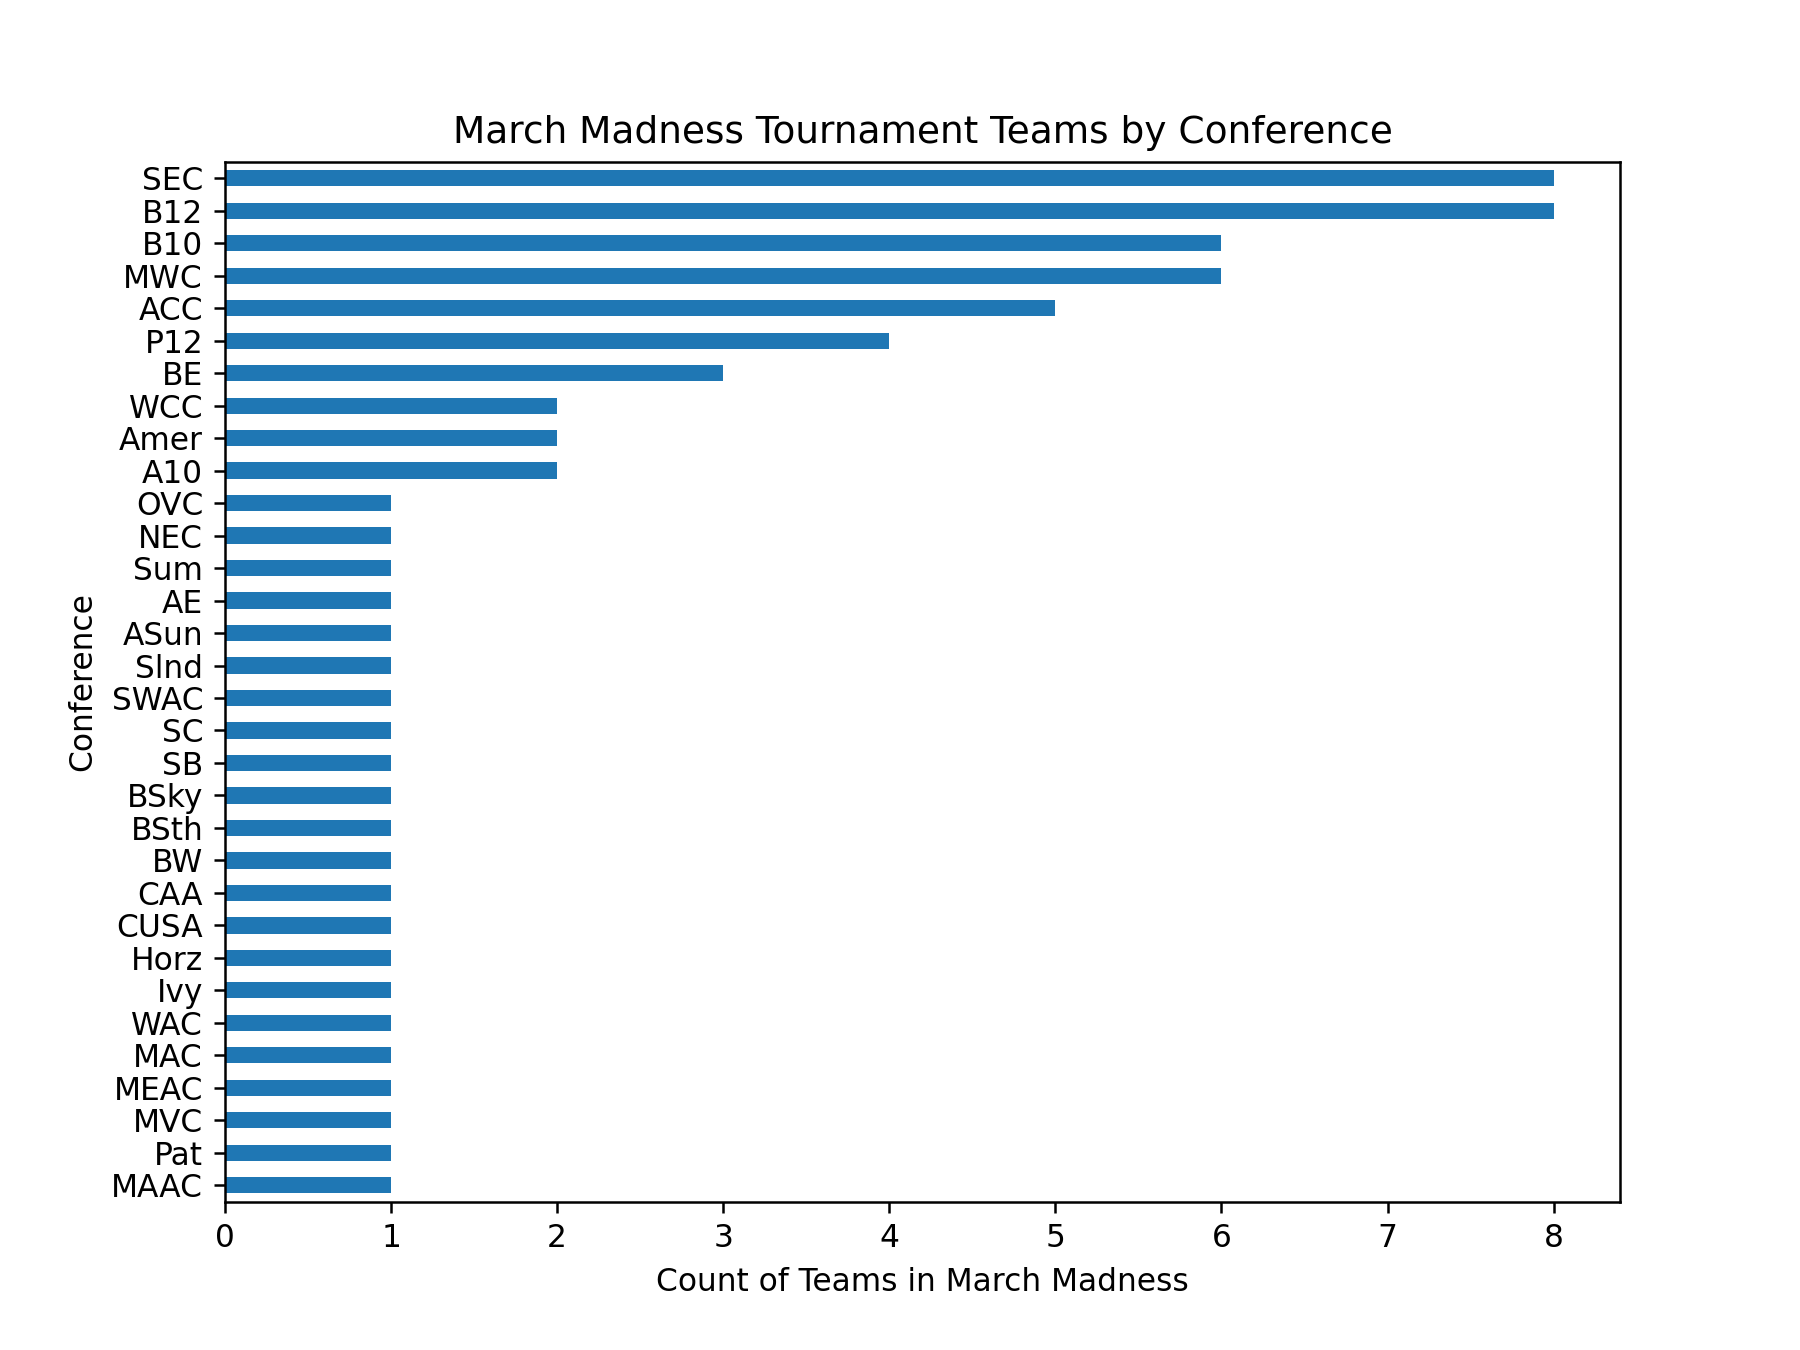

<Axes: title={'center': 'March Madness Tournament Teams by Conference'}, xlabel='Count of Teams in March Madness', ylabel='Conference'>

In [53]:
#Top 80 KenPom teams conference distribution
fig, ax = plt.subplots(figsize=(8,6))

KenPom.groupby("Conf").count().Team.sort_values().plot.barh(ax=ax,
                                                            ylabel="Conference", 
                                                            xlabel="Count of Teams in March Madness", 
                                                            title = "March Madness Tournament Teams by Conference")

<IPython.core.display.Javascript object>


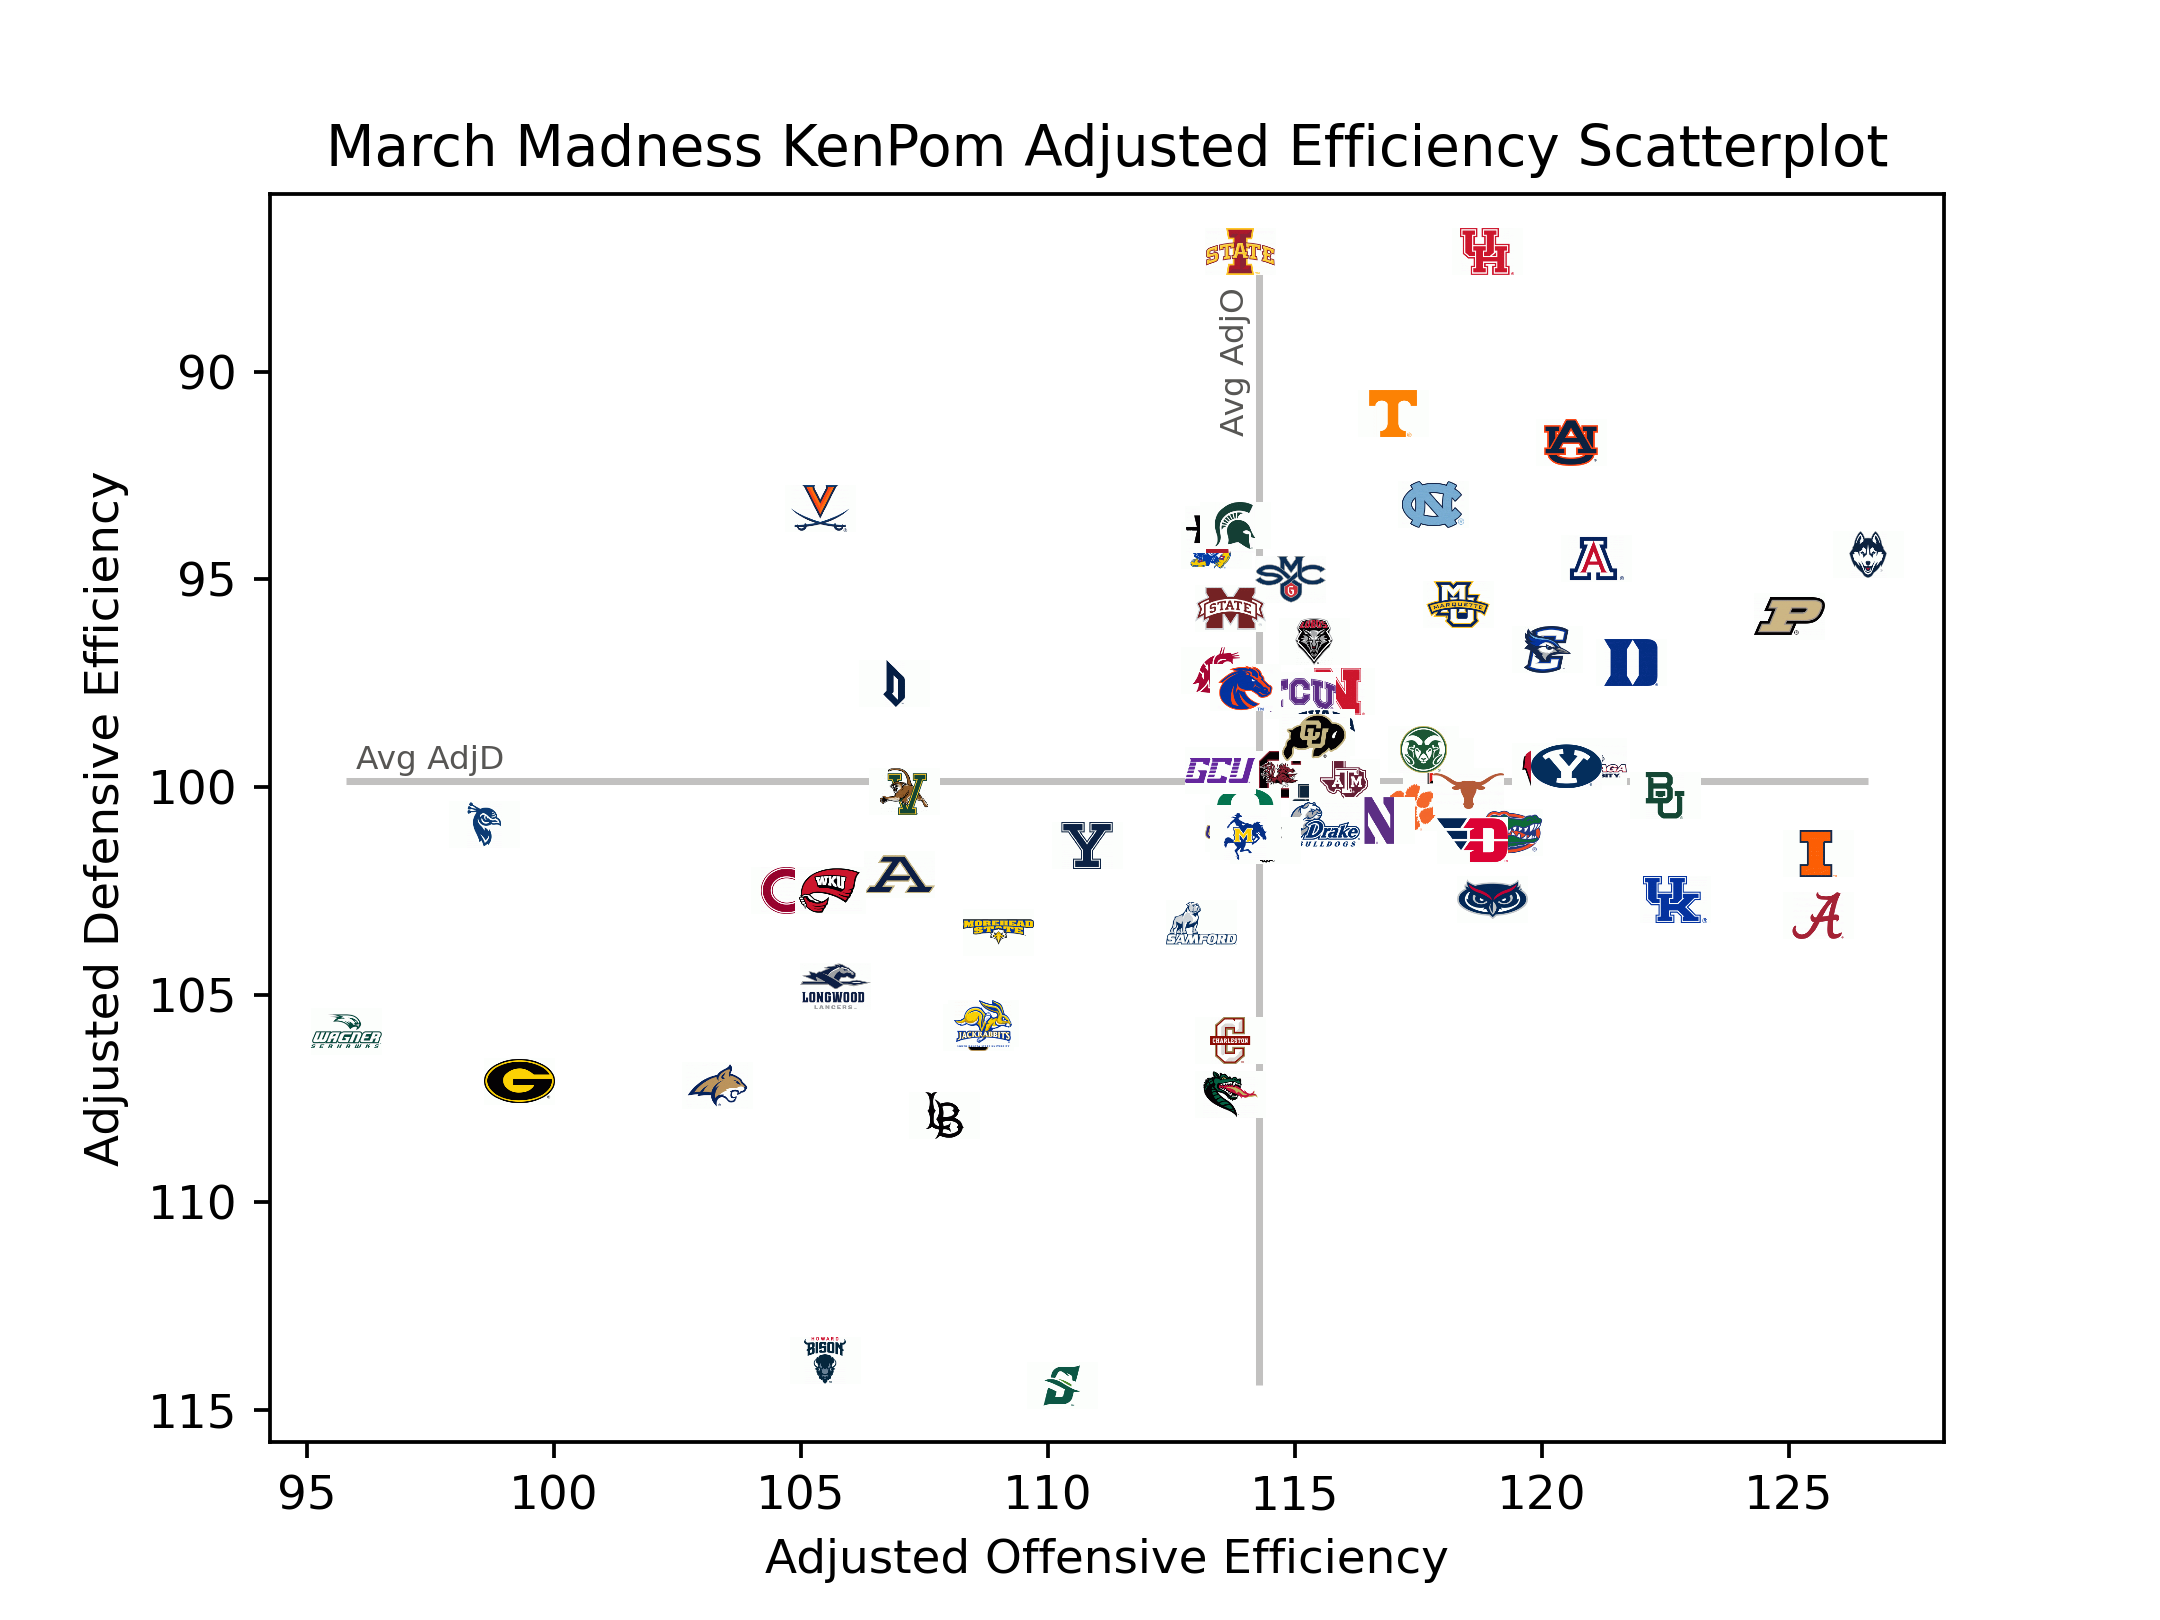

<Axes: title={'center': 'March Madness KenPom Adjusted Efficiency Scatterplot'}, xlabel='Adjusted Offensive Efficiency', ylabel='Adjusted Defensive Efficiency'>

Text(0.565, 0.735, 'Avg AdjO')

Text(0.165, 0.525, 'Avg AdjD')

In [57]:
fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution

KenPom.plot.scatter(x="AdjO", 
                    y="AdjD", 
                    ylabel="Adjusted Defensive Efficiency", 
                    xlabel="Adjusted Offensive Efficiency", 
                    title="March Madness KenPom Adjusted Efficiency Scatterplot",
                    ax=ax)

ax.invert_yaxis() #we want better defensive efficiency to be higher on the chart (fewer points allowed)

# Add average lines
plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

# Average line labels
fig.text(.565,.735,'Avg AdjO', size=7, color='#575654',rotation=90)
fig.text(.165,.525,'Avg AdjD', size=7, color='#575654')

def getImage(path, zoom = 0.1):
    return OffsetImage(plt.imread(path), zoom=zoom)

#Annotate logos on data points in scatterplot
for x, y, path in zip(KenPom["AdjO"], KenPom["AdjD"], KenPom["New Path"]):
    
    ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
    ax.add_artist(ab)

#Save figure
fig.savefig("data/NCAATournament_KenPom_2024.pdf")

In [63]:
#Interactive chart to filter by conference opponents
@interact_manual

def conference_scatter(Conference = list(KenPom.Conf.unique())): #list of conferences
    
    data = KenPom[KenPom.Conf == Conference] #KenPom data is filtered using list input
    
    fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution
    
    data.plot.scatter(x="AdjO",y="AdjD", 
                      ylabel="Adjusted Defensive Efficiency", 
                      xlabel="Adjusted Offensive Efficiency",
                      title=f"KenPom Adjusted Efficiency Scatterplot: {Conference}", #allow title to be changed accordingly
                      ax=ax).invert_yaxis()

    # Add average lines
    plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
    plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

    # Average line labels
    fig.text(.560,.705,'Avg AdjO', size=9, color='#575654',rotation=90)
    fig.text(.165,.525,'Avg AdjD', size=9, color='#575654')
    
    #Annotate logos on data points in scatterplot
    for x, y, path in zip(data["AdjO"], data["AdjD"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Conference', options=('BE', 'B12', 'B10', 'ACC', 'P12', 'SEC', 'WC…

In [64]:
#See values at a quick glance for reference to chart above
@interact
def conference_select(Conference = list(KenPom.Conf.unique())):
    return(KenPom[KenPom.Conf == Conference][["Team Mascot", "W-L","AdjEM","AdjO","AdjD","AdjTempo","Luck"]])

interactive(children=(Dropdown(description='Conference', options=('BE', 'B12', 'B10', 'ACC', 'P12', 'SEC', 'WC…

In [67]:
@interact_manual

def tempo_conf_scatter(Efficiency = ["AdjEM", "AdjO", "AdjD"], 
                  Conference = list(KenPom.Conf.unique())):
    
    data = KenPom[KenPom.Conf == Conference]
    
    fig, ax = plt.subplots(dpi=150)
    
    if f"{Efficiency}" == "AdjEM": 
        ylabel = "Adjusted Efficiency Margin"
    elif f"{Efficiency}" == "AdjD":
        ylabel = "Adjusted Defensive Efficiency"
    else:
        ylabel = "Adjusted Offensive Efficiency"
    
    data.plot.scatter(x="AdjTempo",y=f"{Efficiency}", 
                      ylabel= ylabel, 
                      xlabel="Adjusted Tempo",
                      title=f"KenPom Adjusted Efficiency vs Tempo Scatterplot: {Conference}",
                      ax=ax)
    
    #Invert y-axis if defensive efficiency is selected
    if f"{Efficiency}" == "AdjD":
        ax.invert_yaxis()
    else: None

    for x, y, path in zip(data["AdjTempo"], data[f"{Efficiency}"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Efficiency', options=('AdjEM', 'AdjO', 'AdjD'), value='AdjEM'), Dr…

In [71]:
@interact_manual

def seed_scatter(Seed = list(KenPom.Seed.unique())): #list of conferences
    
    data = KenPom[KenPom.Seed == Seed] #KenPom data is filtered using list input
    
    fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution
    
    data.plot.scatter(x="AdjO",y="AdjD", 
                      ylabel="Adjusted Defensive Efficiency", 
                      xlabel="Adjusted Offensive Efficiency",
                      title=f"KenPom Adjusted Efficiency Scatterplot: {Seed} Seeds", #allow title to be changed accordingly
                      ax=ax).invert_yaxis()

    # Add average lines
    plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
    plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

    # Average line labels
    fig.text(.560,.705,'Avg AdjO', size=9, color='#575654',rotation=90)
    fig.text(.165,.525,'Avg AdjD', size=9, color='#575654')
    
    #Annotate logos on data points in scatterplot
    for x, y, path in zip(data["AdjO"], data["AdjD"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Seed', options=('\xa01', '\xa02', '\xa03', '\xa04', '\xa05', '\xa0…

In [70]:
@interact_manual

def tempo_seed_scatter(Efficiency = ["AdjEM", "AdjO", "AdjD"], 
                  Seed = list(KenPom.Seed.unique())):
    
    data = KenPom[KenPom.Seed == Seed]
    
    fig, ax = plt.subplots(dpi=150)
    
    if f"{Efficiency}" == "AdjEM": 
        ylabel = "Adjusted Efficiency Margin"
    elif f"{Efficiency}" == "AdjD":
        ylabel = "Adjusted Defensive Efficiency"
    else:
        ylabel = "Adjusted Offensive Efficiency"
    
    data.plot.scatter(x="AdjTempo",y=f"{Efficiency}", 
                      ylabel= ylabel, 
                      xlabel="Adjusted Tempo",
                      title=f"KenPom Adjusted Efficiency vs Tempo Scatterplot: {Seed} Seeds",
                      ax=ax)
    
    #Invert y-axis if defensive efficiency is selected
    if f"{Efficiency}" == "AdjD":
        ax.invert_yaxis()
    else: None

    for x, y, path in zip(data["AdjTempo"], data[f"{Efficiency}"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Efficiency', options=('AdjEM', 'AdjO', 'AdjD'), value='AdjEM'), Dr…